In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("plant_disease_dataset.csv")

In [5]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [6]:
df_corr = df.corr()

df_corr
    

,temperature,humidity,rainfall,soil_pH,disease_present
temperature,1.000000,-0.010136,-0.018284,-0.016792,-0.000869
humidity,-0.010136,1.000000,0.011850,0.008483,0.199241
rainfall,-0.018284,0.011850,1.000000,0.006270,0.218602
soil_pH,-0.016792,0.008483,0.006270,1.000000,-0.074088
disease_present,-0.000869,0.199241,0.218602,-0.074088,1.000000


<Axes: >

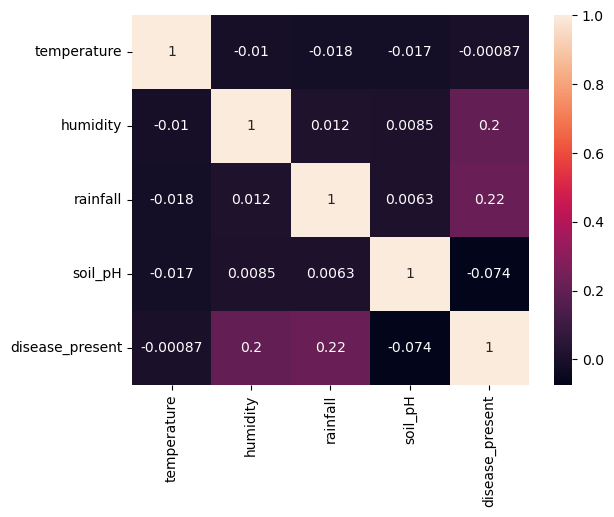

In [9]:
sns.heatmap(df_corr, annot = True)

In [11]:
X=df.drop('disease_present', axis = 1)
y=df['disease_present']

In [12]:
X

,temperature,humidity,rainfall,soil_pH
0,27.483571,33.215053,0.572758,4.975875
1,24.308678,36.945005,42.522346,8.165266
2,28.238443,34.026189,16.095303,6.316734
3,32.615149,41.104180,20.311015,6.164949
4,23.829233,51.971785,11.851323,8.482468
...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952
9996,15.008275,86.886833,10.503881,4.070539
9997,21.473416,81.891770,13.426869,7.101583
9998,27.478828,88.567649,9.719659,7.732620


In [14]:
df.columns

Index(['temperature', 'humidity', 'rainfall', 'soil_pH', 'disease_present'], dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [35]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print("The accuracy is: ", score)
print("Confusion matrix :", matrix)

The accuracy is:  0.848
Confusion matrix : [[1406  112]
 [ 192  290]]


In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3,5,10,None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy'],
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [44]:
import pickle

with open('plant_disease_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)